<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [67]:
from bs4 import BeautifulSoup
import requests

import pandas as pd
df = pd.read_csv('./data/job_listings.csv')
print(df.shape)

(426, 3)


In [70]:
df['description'][1]

'b\'<div>Job Description<br/>\\n<br/>\\n<p>As a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences.</p><p><b>\\nA day in the life\\xe2\\x80\\xa6</b></p><ul><li>\\nWork with a small agile team to design and develop mobile applications in an iterative fashion.</li><li>\\nWork with a tight-knit group of development team members in Seattle.</li><li>\\nContribute to best practices and help guide the future of our applications.</li><li>\\nOperates effectively as a collaborative member of the development team.</li><li>\\nOperates effectively as an individual for quick turnaround of enhancements and fixes.</li><li>\\nResponsible for meeting expectations and deliverables on time with high quality.</li><li>\\nDrive and implement new features within our mobile applications.</li><li>\\nP

In [71]:
def remove_html(text):
    soup = BeautifulSoup(text, 'html.parser')
    html_free = soup.get_text()
    return html_free

df['text']=df['description'].apply(remove_html)
df['text'][1]

'b\'Job Description\\n\\nAs a Data Scientist 1, you will help us build machine learning models, data pipelines, and micro-services to help our clients navigate their healthcare journey. You will do so by empowering and improving the next generation of Accolade Applications and user experiences.\\nA day in the life\\xe2\\x80\\xa6\\nWork with a small agile team to design and develop mobile applications in an iterative fashion.\\nWork with a tight-knit group of development team members in Seattle.\\nContribute to best practices and help guide the future of our applications.\\nOperates effectively as a collaborative member of the development team.\\nOperates effectively as an individual for quick turnaround of enhancements and fixes.\\nResponsible for meeting expectations and deliverables on time with high quality.\\nDrive and implement new features within our mobile applications.\\nPerform thorough manual testing and writing test cases that cover all areas.\\nIdentify new development tool

In [74]:
import re

def tokenize(text):
    tokens = re.sub(r'[^a-z ^A-Z ^0-9]', ' ', text)
    tokens = tokens.lower().split() 
    return tokens

In [76]:
df['clean']=df['text'].apply(lambda x: tokenize(x))
df['clean'].head()

0    [b, job, requirements, nconceptual, understand...
1    [b, job, description, n, nas, a, data, scienti...
2    [b, as, a, data, scientist, you, will, be, wor...
3    [b, 4, 969, 6, 756, a, monthcontractunder, the...
4    [b, location, usa, xe2, x80, x93, multiple, lo...
Name: clean, dtype: object

## 2) Use Spacy to tokenize the listings 

In [81]:
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

In [78]:
df['tokens']=df['text'].apply(tokenize)
df['tokens'].head()
# I still cannot get ride of "n", ideas????

0    [b, job, requirements, nconceptual, understand...
1    [b, job, description, n, nas, a, data, scienti...
2    [b, as, a, data, scientist, you, will, be, wor...
3    [b, 4, 969, 6, 756, a, monthcontractunder, the...
4    [b, location, usa, xe2, x80, x93, multiple, lo...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()

In [86]:
vect.fit(df['text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [91]:
dtm = vect.transform(df['text'])
word_count_table = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
word_count_table.head()

,00,000,02115,03,0356,04,062,06366,08,10,...,zenreach,zero,zeus,zf,zheng,zillow,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

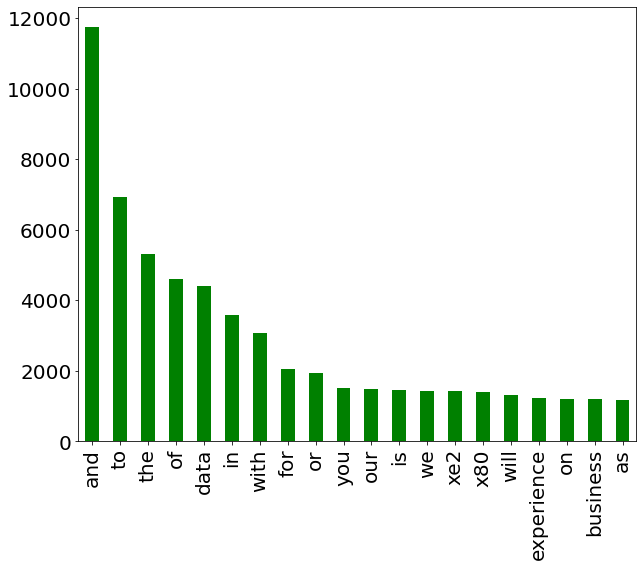

In [110]:
# plot the most common word counts (top 20):
fig, ax=plt.subplots(figsize=(8,6))
word_count_table.sum().sort_values(ascending=False)[:20].plot(kind='bar', ax=ax, color='g')
ax.tick_params(labelsize=16)
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features = 5000)

dtm = tfidf.fit_transform(df['text'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head(10)

,000,04,10,100,1079302,11,12,125,14,15,...,years,yearthe,yes,yeti,york,young,yrs,zeus,zf,zillow
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.093431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.012909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.025311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.043714,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [125]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=6, algorithm='ball_tree') # metric is distance
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=6, p=2, radius=1.0)

In [126]:
my_ideal_ds_job = ['''
Experience in python, statistic modeling, pipleline making, machine learning.
Great location. Great pay. Flexible hours. Part time.
Environmental background preferred.
Join a team with different background.  
''']

In [127]:
new = tfidf.transform(my_ideal_ds_job)

nn.kneighbors(new.todense())

(array([[1.31045876, 1.33143937, 1.33264293, 1.3338393 , 1.3338393 ,
         1.33908533]]),
 array([[ 84, 173, 283,  23, 123,  53]]))

In [143]:
# inspect most relevant result:
df['text'][84].replace("\\n", " ").replace("r[\\\']", " ")

'b\'InternshipData Scientist Intern  Are you someone interested in applying your knowledge and experience about machine learning and artificial intelligence onto real applications? Then here\\\'s your chance to be a Data Scientist Intern on the Research and Development team at HCSS!  Being a software company in the construction realm, we\\\'re constantly innovating and playing with the latest tools, providing high quality support for our customers while providing a great work-life balance for our employees.  What are you expected to do?   Participate in efforts to create software to perform data analysis that will include: Artificial Intelligence modeling Data mining Designing and implementing deployment to include API  Requirements:  Knowledge of Python programing Familiarity with AI modeling libraries like TensorFlow and Keras Familiarity with query languages like SQL During the time of your internship, you must be enrolled in an accredited college/university and be able to commute t

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 